<h1>Email Classification using Random Forest, SVM and ANN</h1>

## 1) Objectives of this Workshop:

- Preprocessing an email dataset using Vectorizer
- Data Exploration using pie chart and world cloud
- Data Modeling
- Build the Confusion matrix

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 1. **Data Pre-processing**

#  *Exemple of Vectorizer*

Preprocessing of text data

In [ ]:
# example of differents emails

messages = ['I am coming to see you',
              "PLEASE don't let me like that!",
              'Mr. TAMO is a True and good farmer',
              'We will choose one number between one, 2 and 11']

We have to clean the data using regex, matching patterns in the e-mail messages, and replace them with more organized counterparts. Cleaner data leads to a more efficient model and higher accuracy. Following steps are involved in pre-processing the messages :

- Lower case every data
- Remove punctuation
- Remove the stops words


In [ ]:
##  initialize our method 

vectorizer = CountVectorizer(stop_words = set(stopwords.words('english')))

In [ ]:
vectorizer.fit(messages)

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [ ]:
## the name of our features call agains tokens

vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['11',
 'choose',
 'coming',
 'farmer',
 'good',
 'let',
 'like',
 'mr',
 'number',
 'one',
 'please',
 'see',
 'tamo',
 'true']

In [ ]:
#transform the dataset

messages_transf = vectorizer.transform(messages)
messages_transf

<4x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
#convert it to a dense matrix

messages_transf.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]])

In [ ]:
# Generate a Dataframe
pd.DataFrame(messages_transf.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,11,choose,coming,farmer,good,let,like,mr,number,one,please,see,tamo,true
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,1,0,0,0,0,1,1
3,1,1,0,0,0,0,0,0,1,2,0,0,0,0


In [ ]:
# We don't remove the stops words
vectorizer2 = CountVectorizer(stop_words=None)

In [ ]:
vectorizer2.fit(messages)

CountVectorizer()

In [ ]:
vectorizer2.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['11',
 'am',
 'and',
 'between',
 'choose',
 'coming',
 'don',
 'farmer',
 'good',
 'is',
 'let',
 'like',
 'me',
 'mr',
 'number',
 'one',
 'please',
 'see',
 'tamo',
 'that',
 'to',
 'true',
 'we',
 'will',
 'you']

In [ ]:
#Total length removal

a=len(vectorizer2.get_feature_names()) # before remove stop words
b=len(vectorizer.get_feature_names()) # after remove stop words
print("Original Length:",a)
print("Cleaned Length:",b)
print("Total Words Removed:",a - b)


Original Length: 25
Cleaned Length: 14
Total Words Removed: 11


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Let us try another method whith TfidfVectorizer method

First of all, we need to put our message on the table

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data  = pd.DataFrame(messages)
data.columns =  ['emails']
data

,emails
0,I am coming to see you
1,PLEASE don't let me like that!
2,Mr. TAMO is a True and good farmer
3,"We will choose one number between one, 2 and 11"


In [ ]:
vectorizer3 = TfidfVectorizer(stop_words = set(stopwords.words('english')))

In [ ]:
stop_words=vectorizer3.fit(data)
stop_words

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [ ]:
features = vectorizer3.fit_transform(data['emails'])


In [ ]:
features

<4x14 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
print(features)

  (0, 11)	0.7071067811865476
  (0, 2)	0.7071067811865476
  (1, 6)	0.5773502691896257
  (1, 5)	0.5773502691896257
  (1, 10)	0.5773502691896257
  (2, 3)	0.4472135954999579
  (2, 4)	0.4472135954999579
  (2, 13)	0.4472135954999579
  (2, 12)	0.4472135954999579
  (2, 7)	0.4472135954999579
  (3, 0)	0.3779644730092272
  (3, 8)	0.3779644730092272
  (3, 9)	0.7559289460184544
  (3, 1)	0.3779644730092272


In [ ]:
pd.DataFrame(features.toarray(), columns=vectorizer3.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,11,choose,coming,farmer,good,let,like,mr,number,one,please,see,tamo,true
0,0.000000,0.000000,0.707107,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.707107,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.447214,0.447214,0.00000,0.00000,0.447214,0.000000,0.000000,0.00000,0.000000,0.447214,0.447214
3,0.377964,0.377964,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.377964,0.755929,0.00000,0.000000,0.000000,0.000000


In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Now let's take our emails dataset csv file and build our ML code

# 3. **Data Preprocessing**



In [ ]:
email = pd.read_csv("/content/gdrive/MyDrive/Email Classification Algorithm/emails.csv")
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In this step, we explore data and gain insights such as shape ( form ), structure, type of mail, and percentage of each type.

First, we check the information of the given dataset and extract information about the dataset

In [ ]:
stop_word= stopwords.words('english')
for word in stop_word:
  if word in email.columns:
    email.drop(word, axis=1, inplace=True) # delete the stop word on the columns

In [ ]:
print(email.head(5))

  Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  Prediction
0   Email 1    1    0      0    0  ...         0         0   0    0           0
1   Email 2   24   27      1    3  ...         0         0   1    0           0
2   Email 3    1    0      0    0  ...         0         0   0    0           0
3   Email 4   22   10      0    0  ...         0         0   0    0           0
4   Email 5   17    9      0    0  ...         0         0   1    0           0

[5 rows x 2868 columns]


In [ ]:
# Rename the prediction column into label

email=email.rename(columns={'Prediction' : 'label'})
print(email.head(5))


  Email No.  ect  hou  enron  com  ...  military  allowing  ff  dry  label
0   Email 1    1    0      0    0  ...         0         0   0    0      0
1   Email 2   24   27      1    3  ...         0         0   1    0      0
2   Email 3    1    0      0    0  ...         0         0   0    0      0
3   Email 4   22   10      0    0  ...         0         0   0    0      0
4   Email 5   17    9      0    0  ...         0         0   1    0      0

[5 rows x 2868 columns]


## Investigating the shape of the dataset

In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 2868 entries, Email No. to label
dtypes: int64(2867), object(1)
memory usage: 113.2+ MB


In [ ]:
print("The shape of the dataset is:", email.shape)


The shape of the dataset is: (5172, 2868)


In [ ]:

print("Count of label: ", email['label'].value_counts())

Count of label:  0    3672
1    1500
Name: label, dtype: int64


For the rest of the work, we consider that label 1 corresponds to Spam mail and lable 0 corresponds to Non spam mail 


In [ ]:
## Proceeding with Checking Ratio or percentage of Labels i.e. Spam and Non-Spam emails

print("Percentage of Non Spam mail:",round(len(email[email['label']
                                      ==0])/len(email['label']),2)*100,"%")
print("Percentage of Spam mail:",round(len(email[email['label']
                                      ==1])/len(email['label']),2)*100,"%")

Percentage of Non Spam mail: 71.0 %
Percentage of Spam mail: 28.999999999999996 %


# 4- **Exploratory Data Analysis (EDA)**

Visualizing ratio non - Spam/Spam:



<function matplotlib.pyplot.show>

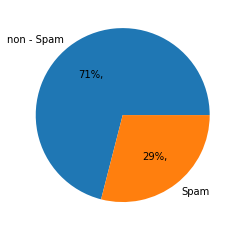

In [ ]:
print("Visualizing ratio non - Spam/Spam:\n")
count = pd.value_counts(email['label'], sort=True) # count the number of 1 and 0
count.plot(kind = 'pie',labels=['non - Spam','Spam'], autopct='%1.0f%%,')
plt.ylabel('')
plt.show

## visualization Word Cloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

(-0.5, 1599.5, 799.5, -0.5)

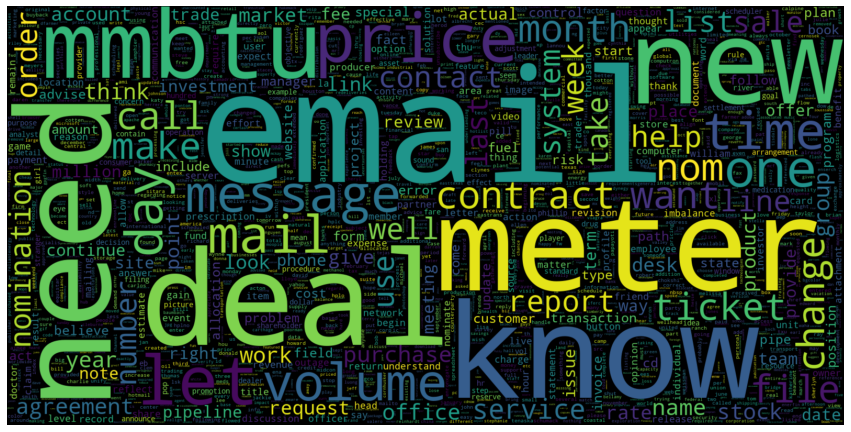

In [ ]:
#Now let's add a string value instead to make our Series clean
colt = list(email.columns)
join_word=" ".join(colt)

# Create and generate a word cloud image:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="black",  max_words=2000, max_font_size= 300,  width=1600,
               height=800)
wc.generate(join_word)

# Display the generated image:
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

### Let's define our Input and Output columns

In [ ]:
# Here we split our feature and our prediction to do test and training.

Input = email.iloc[:,1:-1] # extract all the features without  the first and the last column
Output = email['label']   # extract the output
print(Input.shape)
print(Output.shape)



(5172, 2866)
(5172,)


In [ ]:
Input.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,corp,know,need,forwarded,new,may,j,mmbtu,get,see,price,daren,company,l,let,would,xls,farmer,attached,us,information,message,day,time,one,http,th,volume,mail,contract,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,1,0,0,3,0,0,8,0,2,1,0,3,0,35,0,1,0,3,1,2,0,0,2,2,3,0,15,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,0,0,0,2,0,0,5,0,0,1,0,2,0,27,0,0,0,1,0,0,0,0,1,0,1,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,0,0,0,2,0,0,3,0,1,0,0,1,0,34,0,0,0,0,0,0,0,0,0,0,0,0,12,3,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
Output.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Build the ML Algorithm

After splitting the data into test and train using train test split function, we will apply the Random Forest classifier.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import seaborn as sns


In [ ]:
# Splitting data into test and train

x_train, x_test, y_train, y_test = train_test_split(Input,Output, test_size=0.2, random_state=42)

We are performing a train test split on the dataset. We are providing the test size as 0.2, that means our training sample contains 4138 training set and test sample contains 1034 test set

# Random Forest classifier

Random forests is a supervised learning algorithm. It can be used both for classification and regression. here we will use it for classification. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting

In [ ]:
# Random Forest classifier with the train test split function.

#Create a Gaussian Classifier
RandomForest =  RandomForestClassifier(n_estimators=100, criterion="gini") # number of trees and to measure the quality of a split.

#Train the model using the training sets 
RandomForest.fit(x_train,y_train)

# prediction on test set
y_predRFC = RandomForest.predict(x_test)

# Model Accuracy, how often is the classifier correct
print(classification_report(y_predRFC, y_test))
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_predRFC,y_test))



              precision    recall  f1-score   support

           0       0.98      0.99      0.98       729
           1       0.98      0.94      0.96       306

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035

Accuracy Score of Random Forest Classifier :  0.9768115942028985


Text(33.0, 0.5, 'True labels')

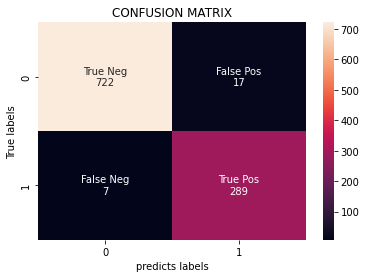

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predRFC)

# gives the name for each group
group_names = ['True Neg','False Pos','False Neg','True Pos']

# count the number of labels of each group and save
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# assign each value to each group
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]

# put our confusion matrix in the matrix with 2 rows and 2 columns
labels = np.asarray(labels).reshape(2,2)

#design our matrix with color
sns.heatmap(cm, annot=labels, fmt='')

plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

# Support Vector Machine

In [ ]:
#Create a SVM Classifier
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

#Train the model using the training sets y_predSVM=rfc.predict(test_x)
SVM.fit(x_train,y_train)

# prediction on test set
y_predSVM = SVM.predict(x_test)

# Model Accuracy, how often is the svm correct
print(classification_report(y_predSVM, y_test))
print("Accuracy Score of SVM : ", accuracy_score(y_predSVM,y_test))



              precision    recall  f1-score   support

           0       0.97      0.97      0.97       738
           1       0.93      0.93      0.93       297

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Accuracy Score of SVM :  0.9584541062801932


Text(33.0, 0.5, 'True labels')

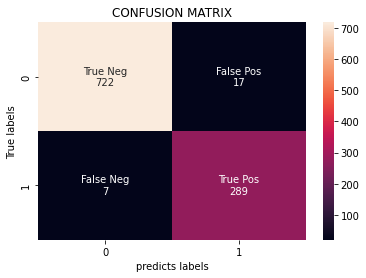

In [ ]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_predSVM)
group_names_svm = ['True Neg','False Pos','False Neg','True Pos']
group_counts_svm = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names_svm,group_counts_svm)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svm, annot=labels, fmt='')
plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

# Artificial Neural Network

Artificial Neural Networks(ANN) are part of supervised machine learning where we will be having input as well as corresponding output present in our dataset. From the perspective of this blog, we will be developing an ANN for solving the classification class of our problems and compare it to others methods.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#Initialising ANN
ANN = Sequential()

 Once we initialize our ann, we are now going to create layers for the same. Here we are going to create a network 
that will have 2 hidden layers, 1 input layer, and 1 output layer. So, let’s create our very first hidden layer

1. units:- number of neurons that will be present in the respective layer
2. activation:- specify which activation function to be used

In [ ]:
#Adding First Hidden Layer
# we will use “relu”[rectified linear unit] as an activation function for hidden layers.
ANN.add(Dense(units=6,activation="relu")) 

#Adding Second Hidden Layer 
ANN.add(Dense(units=6,activation="relu"))

#Adding Output Layer
ANN.add(Dense(units=1,activation="sigmoid"))

#Compiling ANN
#1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
#2. loss:- specifies which loss function should be used.
#3.  metrics:- which performance metrics to be used in order to compute performance

ANN.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

x_train = np.array(x_train) # Put train_x in a matrix

#Fitting ANN
# 1.batch_size: how many observations should be there in the batch. Usually, 
        #the value for this parameter is 32 
# 2. epochs: How many times neural networks will be trained. Here the optimal value that 
      #we have found from our experience is 100.

ANN.fit(x_train, y_train,batch_size=32,epochs = 15)

Epoch 1/15
130/130 [==============================] - 1s 2ms/step - loss: 0.5397 - accuracy: 0.7404
Epoch 2/15
130/130 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8924
Epoch 3/15
130/130 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9417
Epoch 4/15
130/130 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9679
Epoch 5/15
130/130 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9811
Epoch 6/15
130/130 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9865
Epoch 7/15
130/130 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9913
Epoch 8/15
130/130 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9932
Epoch 9/15
130/130 [==============================] - 1s 4ms/step - loss: 0.0365 - accuracy: 0.9964
Epoch 10/15
130/130 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9978

In [ ]:
accuracy_score=ANN.evaluate(x_train,y_train)

130/130 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9990


In [ ]:
x_test = np.array(x_test)
accuracy_score=ANN.evaluate(x_test,y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9797
